In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv("PdM_telemetry.csv")
df1 = pd.read_csv("PdM_failures.csv")
df2 = pd.read_csv("PdM_machines.csv")
df3 = pd.read_csv("PdM_errors.csv")

In [3]:
df1['datetime']=pd.to_datetime(df1['datetime'])

In [4]:
df1['failure']=df1['failure'].astype(str)
df1.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [5]:
label_encoder=LabelEncoder()
df1['failure_encoded']=label_encoder.fit_transform(df1['failure'])
df1.head()

,datetime,machineID,failure,failure_encoded
0,2015-01-05 06:00:00,1,comp4,3
1,2015-03-06 06:00:00,1,comp1,0
2,2015-04-20 06:00:00,1,comp2,1
3,2015-06-19 06:00:00,1,comp4,3
4,2015-09-02 06:00:00,1,comp4,3


In [6]:
merged_df=pd.merge(df1,df2)
merged_df.head()

,datetime,machineID,failure,failure_encoded,model,age
0,2015-01-05 06:00:00,1,comp4,3,model3,18
1,2015-03-06 06:00:00,1,comp1,0,model3,18
2,2015-04-20 06:00:00,1,comp2,1,model3,18
3,2015-06-19 06:00:00,1,comp4,3,model3,18
4,2015-09-02 06:00:00,1,comp4,3,model3,18


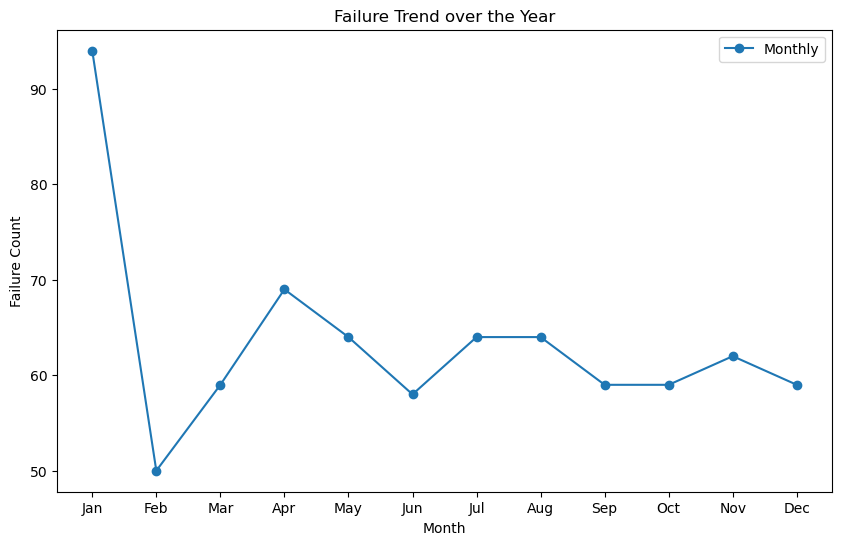

In [7]:

# Group failures by month or quarter
# failures_by_month = merged_df.groupby(merged_df['datetime'].dt.month)['failure_encoded'].size().reset_index()

failures_by_month = merged_df.groupby(merged_df['datetime'].dt.month)['failure_encoded'].size()
# failures_by_quarter = merged_df.groupby(merged_df['datetime'].dt.quarter)['failure_encoded'].size()

# Plotting the failure trend over the year
plt.figure(figsize=(10, 6))
plt.plot(failures_by_month.index, failures_by_month.values, marker='o', label='Monthly')
# plt.plot(failures_by_quarter.index, failures_by_quarter.values, marker='o', label='Quarterly')

plt.title('Failure Trend over the Year')
plt.xlabel('Month')
plt.ylabel('Failure Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()
plt.show()


In [8]:
min_datetime = merged_df['datetime'].min()

merged_df['days'] = (merged_df['datetime'] - min_datetime).dt.days

print(merged_df)

               datetime  machineID failure  failure_encoded   model  age  days
0   2015-01-05 06:00:00          1   comp4                3  model3   18     3
1   2015-03-06 06:00:00          1   comp1                0  model3   18    63
2   2015-04-20 06:00:00          1   comp2                1  model3   18   108
3   2015-06-19 06:00:00          1   comp4                3  model3   18   168
4   2015-09-02 06:00:00          1   comp4                3  model3   18   243
..                  ...        ...     ...              ...     ...  ...   ...
756 2015-11-29 06:00:00         99   comp3                2  model1   14   331
757 2015-12-14 06:00:00         99   comp4                3  model1   14   346
758 2015-02-12 06:00:00        100   comp1                0  model4    5    41
759 2015-09-10 06:00:00        100   comp1                0  model4    5   251
760 2015-12-09 06:00:00        100   comp2                1  model4    5   341

[761 rows x 7 columns]


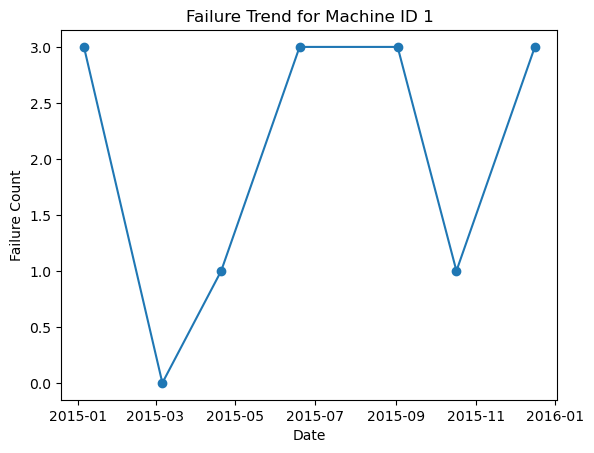

In [9]:
machine_id_1_df = merged_df[merged_df['machineID'] == 1]

failure_trend = machine_id_1_df.groupby('datetime')['failure_encoded'].sum()

plt.plot(failure_trend.index, failure_trend.values, marker='o')
plt.title('Failure Trend for Machine ID 1')
plt.xlabel('Date')
plt.ylabel('Failure Count')
plt.show()


Enter the machine ID: 7


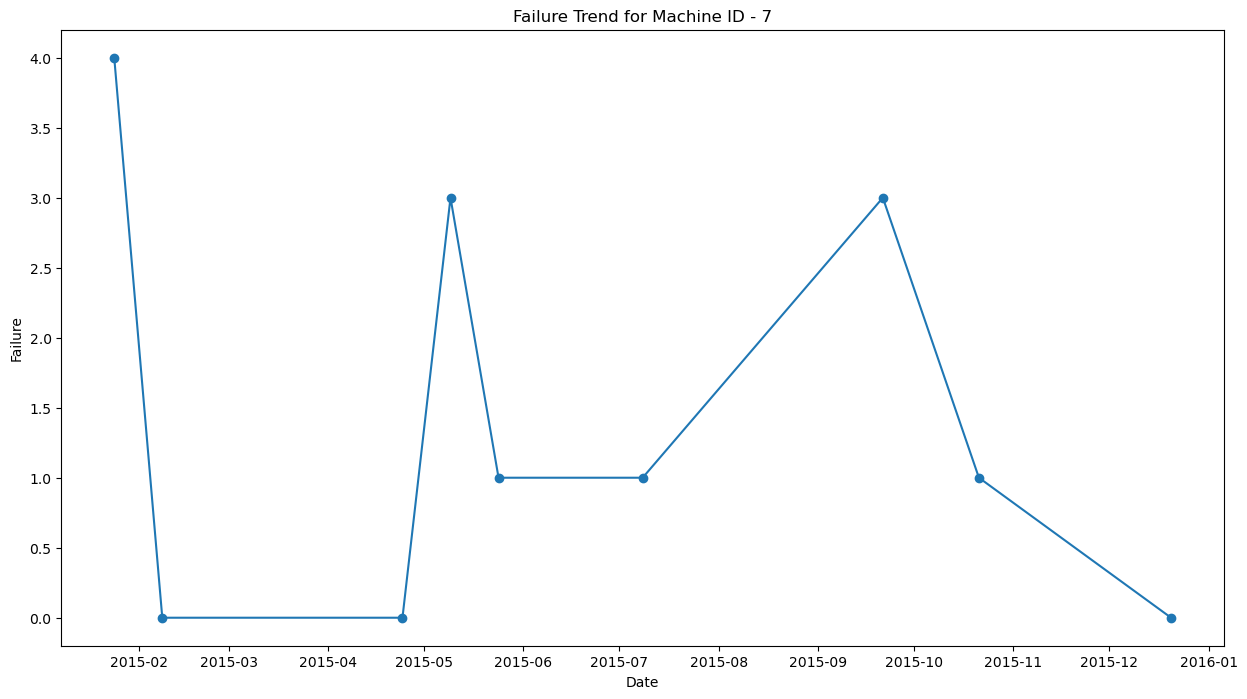

In [10]:
import matplotlib.pyplot as plt

machine_id = int(input("Enter the machine ID: "))

machine_df = merged_df[merged_df['machineID'] == machine_id]

failure_trend = machine_df.groupby('datetime')['failure_encoded'].sum()
plt.figure(figsize=(15, 8))

plt.plot(failure_trend.index, failure_trend.values, marker='o')
plt.title(f"Failure Trend for Machine ID - {machine_id}")
plt.xlabel('Date')
plt.ylabel('Failure')
plt.show()

In [15]:
from catboost import CatBoostClassifier
tele_fail = pd.merge(df,df1)
tele_fail.shape
tele_fail['datetime']=pd.to_datetime(tele_fail['datetime'])
tele_fail.set_index('datetime', inplace=True)  

In [16]:
X = tele_fail[['pressure', 'vibration', 'rotate', 'volt']]
y = tele_fail['failure']

pressure = float(input("Enter the pressure value: "))
vibration = float(input("Enter the vibration value: "))
rotation = float(input("Enter the rotation value: "))
voltage = float(input("Enter the voltage value: "))

input_data = pd.DataFrame([[pressure, vibration, rotation, voltage]], columns=['pressure', 'vibration', 'rotate', 'volt'])

model = CatBoostClassifier()
model.fit(X, y)
prediction = model.predict(input_data)
if prediction[0] == 1:
    print("The machine is predicted to fail.")
else:
    print("The machine is predicted to not fail.")

    

Enter the pressure value: 102.36311401901246
Enter the vibration value: 43.33031132182856
Enter the rotation value: 454.8227498192163
Enter the voltage value: 171.01840767589724
Learning rate set to 0.078032
0:	learn: 1.3114490	total: 219ms	remaining: 3m 38s
1:	learn: 1.2484554	total: 228ms	remaining: 1m 53s
2:	learn: 1.1958965	total: 236ms	remaining: 1m 18s
3:	learn: 1.1465707	total: 244ms	remaining: 1m
4:	learn: 1.1047311	total: 250ms	remaining: 49.7s
5:	learn: 1.0696060	total: 255ms	remaining: 42.2s
6:	learn: 1.0369040	total: 259ms	remaining: 36.8s
7:	learn: 1.0052820	total: 264ms	remaining: 32.8s
8:	learn: 0.9767589	total: 268ms	remaining: 29.5s
9:	learn: 0.9537702	total: 272ms	remaining: 27s
10:	learn: 0.9319172	total: 276ms	remaining: 24.8s
11:	learn: 0.9117249	total: 280ms	remaining: 23s
12:	learn: 0.8957939	total: 283ms	remaining: 21.5s
13:	learn: 0.8782323	total: 286ms	remaining: 20.2s
14:	learn: 0.8631879	total: 290ms	remaining: 19s
15:	learn: 0.8462894	total: 293ms	remaining